In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 

In [4]:
data = pd.read_csv ('data_clean_4_21.csv')
data.columns

Index(['fips_code', 'date', 'county', 'state', 'cases', 'deaths', 'State',
       'Staffed.All.Beds', 'Staffed.ICU.Beds', 'Licensed.All.Beds',
       'All.Bed.Occupancy.Rate', 'ICU.Bed.Occupancy.Rate', 'Population',
       'Population..20..', 'Population..65..',
       'Staffed.All.Beds..Per.1000.People.',
       'Staffed.All.Beds..Per.1000.Adults..20...',
       'Staffed.All.Beds..Per.1000.Elderly..65...',
       'Staffed.ICU.Beds..Per.1000.People.',
       'Staffed.ICU.Beds..Per.1000.Adults..20...',
       'Staffed.ICU.Beds..Per.1000.Elderly..65...',
       'Licensed.All.Beds..Per.1000.People.',
       'Licensed.All.Beds..Per.1000.Adults..20...',
       'Licensed.All.Beds..Per.1000.Elderly..65...', 'county_x',
       'staffed_all_beds', 'staffed_icu_beds', 'licensed_all_beds',
       'all_bed_occupancy_rate', 'icu_bed_occupancy_rate', 'population',
       'population_20', 'population_65', 'staffed_all_beds_.per_1000_people.',
       'staffed_all_beds_.per_1000_adults_20..',
       's

In [5]:
cludf=data.copy()
cludf.columns
cludf.drop(['fips_code', 'county_x', 'State'], axis = 1)

,date,county,state,cases,deaths,Staffed.All.Beds,Staffed.ICU.Beds,Licensed.All.Beds,All.Bed.Occupancy.Rate,ICU.Bed.Occupancy.Rate,...,licensed_all_beds_.per_1000_elderly_65..,County_Name,Population_2010,RUCC_2013,Description,Area_name,Rural.urban_Continuum_Code_2013,Urban_Influence_Code_2013,peopleinpoverty2018,medianhouseholdincome
0,2020-04-21,Autauga,Alabama,30,1,55.0,6.0,85.0,0.62,0.53,...,9.823,Autauga County,54571.0,2.0,"Metro - Counties in metro areas of 250,000 to ...",Autauga County,2.0,2.0,"7,587","59,338"
1,2020-04-21,Baldwin,Alabama,123,3,362.0,51.0,386.0,0.64,0.65,...,8.660,Baldwin County,182265.0,3.0,Metro - Counties in metro areas of fewer than ...,Baldwin County,3.0,2.0,"21,069","57,588"
2,2020-04-21,Barbour,Alabama,28,0,30.0,5.0,74.0,0.43,0.42,...,15.315,Barbour County,27457.0,6.0,"Nonmetro - Urban population of 2,500 to 19,999...",Barbour County,6.0,6.0,"6,788","34,382"
3,2020-04-21,Bibb,Alabama,32,0,25.0,0.0,35.0,0.37,NaN,...,9.485,Bibb County,22915.0,1.0,Metro - Counties in metro areas of 1 million p...,Bibb County,1.0,1.0,"4,400","46,064"
4,2020-04-21,Blount,Alabama,26,0,25.0,6.0,25.0,0.50,0.34,...,2.370,Blount County,57322.0,1.0,Metro - Counties in metro areas of 1 million p...,Blount County,1.0,1.0,"7,527","50,412"
5,2020-04-21,Bullock,Alabama,11,0,30.0,0.0,61.0,0.21,NaN,...,36.725,Bullock County,10914.0,6.0,"Nonmetro - Urban population of 2,500 to 19,999...",Bullock County,6.0,6.0,"3,610","29,267"
6,2020-04-21,Butler,Alabama,15,0,66.0,7.0,94.0,0.18,0.38,...,23.529,Butler County,20947.0,6.0,"Nonmetro - Urban population of 2,500 to 19,999...",Butler County,6.0,6.0,"4,731","37,365"
7,2020-04-21,Calhoun,Alabama,83,3,446.0,24.0,590.0,0.49,0.94,...,29.140,Calhoun County,118572.0,3.0,Metro - Counties in metro areas of fewer than ...,Calhoun County,3.0,2.0,"21,719","45,400"
8,2020-04-21,Chambers,Alabama,259,16,0.0,0.0,115.0,NaN,NaN,...,17.525,Chambers County,34215.0,6.0,"Nonmetro - Urban population of 2,500 to 19,999...",Chambers County,6.0,5.0,"6,181","39,917"
9,2020-04-21,Cherokee,Alabama,13,0,45.0,0.0,60.0,0.24,NaN,...,10.033,Cherokee County,25989.0,6.0,"Nonmetro - Urban population of 2,500 to 19,999...",Cherokee County,6.0,6.0,"4,180","42,132"


In [6]:
cludf=cludf.drop(['fips_code', 'county_x', 'date','State','Staffed.All.Beds','Staffed.ICU.Beds',
           'Licensed.All.Beds','All.Bed.Occupancy.Rate','ICU.Bed.Occupancy.Rate',
           'Population','Population..20..','Population..65..','Staffed.All.Beds..Per.1000.People.'
           ,'Staffed.All.Beds..Per.1000.Adults..20...',
           'Staffed.All.Beds..Per.1000.Elderly..65...',
           'Staffed.ICU.Beds..Per.1000.People.','Staffed.ICU.Beds..Per.1000.Adults..20...',
           'Licensed.All.Beds..Per.1000.Elderly..65...','Licensed.All.Beds..Per.1000.People.',
           'Licensed.All.Beds..Per.1000.Adults..20...'], axis = 1)

In [9]:
cludf.columns

Index(['county', 'state', 'cases', 'deaths',
       'Staffed.ICU.Beds..Per.1000.Elderly..65...', 'staffed_all_beds',
       'staffed_icu_beds', 'licensed_all_beds', 'all_bed_occupancy_rate',
       'icu_bed_occupancy_rate', 'population', 'population_20',
       'population_65', 'staffed_all_beds_.per_1000_people.',
       'staffed_all_beds_.per_1000_adults_20..',
       'staffed_all_beds_.per_1000_elderly_65..',
       'staffed_icu_beds_.per_1000_people.',
       'staffed_icu_beds_.per_1000_adults_20..',
       'staffed_icu_beds_.per_1000_elderly_65..',
       'licensed_all_beds_per_1000_people',
       'licensed_all_beds_.per_1000_adults_20..',
       'licensed_all_beds_.per_1000_elderly_65..', 'County_Name',
       'Population_2010', 'RUCC_2013', 'Description', 'Area_name',
       'Rural.urban_Continuum_Code_2013', 'Urban_Influence_Code_2013',
       'peopleinpoverty2018', 'medianhouseholdincome'],
      dtype='object')

In [10]:
cludf = cludf.drop(['County_Name','Staffed.ICU.Beds..Per.1000.Elderly..65...'], axis = 1)
cludf = cludf.drop(['Description','Rural.urban_Continuum_Code_2013','Urban_Influence_Code_2013'], axis = 1)
cludf=cludf.dropna()

In [11]:
cludf

,county,state,cases,deaths,staffed_all_beds,staffed_icu_beds,licensed_all_beds,all_bed_occupancy_rate,icu_bed_occupancy_rate,population,...,staffed_icu_beds_.per_1000_adults_20..,staffed_icu_beds_.per_1000_elderly_65..,licensed_all_beds_per_1000_people,licensed_all_beds_.per_1000_adults_20..,licensed_all_beds_.per_1000_elderly_65..,Population_2010,RUCC_2013,Area_name,peopleinpoverty2018,medianhouseholdincome
0,Autauga,Alabama,30,1,55.0,6.0,85.0,0.62,0.53,55601.0,...,0.146,0.693,1.529,2.064,9.823,54571.0,2.0,Autauga County,"7,587","59,338"
1,Baldwin,Alabama,123,3,362.0,51.0,386.0,0.64,0.65,218022.0,...,0.307,1.144,1.770,2.320,8.660,182265.0,3.0,Baldwin County,"21,069","57,588"
2,Barbour,Alabama,28,0,30.0,5.0,74.0,0.43,0.42,24881.0,...,0.261,1.035,2.974,3.856,15.315,27457.0,6.0,Barbour County,"6,788","34,382"
3,Bibb,Alabama,32,0,25.0,0.0,35.0,0.37,0.00,22400.0,...,0.000,0.000,1.562,2.018,9.485,22915.0,1.0,Bibb County,"4,400","46,064"
4,Blount,Alabama,26,0,25.0,6.0,25.0,0.50,0.34,57840.0,...,0.139,0.569,0.432,0.579,2.370,57322.0,1.0,Blount County,"7,527","50,412"
5,Bullock,Alabama,11,0,30.0,0.0,61.0,0.21,0.00,10138.0,...,0.000,0.000,6.017,7.810,36.725,10914.0,6.0,Bullock County,"3,610","29,267"
6,Butler,Alabama,15,0,66.0,7.0,94.0,0.18,0.38,19680.0,...,0.471,1.752,4.776,6.322,23.529,20947.0,6.0,Butler County,"4,731","37,365"
7,Calhoun,Alabama,83,3,446.0,24.0,590.0,0.49,0.94,114277.0,...,0.277,1.185,5.163,6.821,29.140,118572.0,3.0,Calhoun County,"21,719","45,400"
8,Chambers,Alabama,259,16,0.0,0.0,115.0,0.00,0.00,33615.0,...,0.000,0.000,3.421,4.434,17.525,34215.0,6.0,Chambers County,"6,181","39,917"
9,Cherokee,Alabama,13,0,45.0,0.0,60.0,0.24,0.00,26032.0,...,0.000,0.000,2.305,2.927,10.033,25989.0,6.0,Cherokee County,"4,180","42,132"


In [12]:
income_df=cludf[['peopleinpoverty2018', 'medianhouseholdincome']]
cludf = cludf.drop(['peopleinpoverty2018', 'medianhouseholdincome'], axis = 1)

In [15]:
cludf = cludf.drop(['Area_name'], axis = 1)

In [41]:
CATEGORICAL_FEATURES = ['county', 'state','RUCC_2013']
unstandardized_data = pd.get_dummies(
    cludf,
    columns=CATEGORICAL_FEATURES,
    drop_first=True
)
# it is common to exclude them from standardization.
cols_to_standardize = [
  column for column in cludf.columns
    if column not in CATEGORICAL_FEATURES
]
data_to_standardize = unstandardized_data[cols_to_standardize]

# Create the scaler.
scaler = StandardScaler().fit(data_to_standardize)

# Standardize the data
standardized_data = unstandardized_data.copy()
standardized_columns = scaler.transform(data_to_standardize)
standardized_data[cols_to_standardize] = standardized_columns

In [49]:
X_normalized

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,-0.067576,-0.064002,-0.113499,-0.106358,-0.111606,0.388184,0.316923,-0.083893,-0.084462,-0.095444,...,0.000000,0.000000,0.402442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.042893,-0.053293,0.010203,0.070252,-0.016555,0.426965,0.480678,0.089488,0.094014,0.174127,...,0.000000,0.000000,0.000000,0.403407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.085155,-0.086796,-0.154498,-0.137880,-0.143884,0.036854,0.209883,-0.145840,-0.144749,-0.155131,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.503166,0.000000,0.000000,0.000000
3,-0.066952,-0.069327,-0.125416,-0.129709,-0.127230,-0.083687,-0.400708,-0.119130,-0.118235,-0.132456,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.066019,-0.066768,-0.120786,-0.102294,-0.125572,0.155456,0.057193,-0.078392,-0.078498,-0.078139,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,-0.060603,-0.057917,-0.103094,-0.108361,-0.099438,-0.321929,-0.334759,-0.110431,-0.110107,-0.123341,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.335755,0.000000,0.000000,0.000000
6,-0.069818,-0.067718,-0.106392,-0.099924,-0.106095,-0.431653,0.110878,-0.119193,-0.118935,-0.127151,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.392569,0.000000,0.000000,0.000000
7,-0.042969,-0.042739,0.035386,-0.028764,0.038531,0.114758,0.701388,-0.017151,-0.016016,-0.006884,...,0.000000,0.000000,0.000000,0.323520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,-0.004515,0.011918,-0.093587,-0.089604,-0.070457,-0.539721,-0.276814,-0.074048,-0.073243,-0.076655,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.277637,0.000000,0.000000,0.000000
9,-0.068850,-0.066286,-0.112220,-0.124019,-0.114107,-0.314365,-0.383130,-0.110207,-0.108766,-0.110260,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.384269,0.000000,0.000000,0.000000


In [48]:
X_normalized = normalize(standardized_data) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
#X_normalized

In [50]:
pca=PCA()
pca.fit(X_normalized)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [63]:
pca.explained_variance_ratio_

array([0.30337875, 0.15869218, 0.07579546, 0.05110666, 0.03861763,
       0.02474675, 0.01992126, 0.01605331, 0.0152666 , 0.01353855,
       0.00969089, 0.00929943, 0.00752562, 0.0068342 , 0.00528917,
       0.00506239, 0.00495484, 0.00475594, 0.00473229, 0.00450179,
       0.00443714, 0.00425286, 0.00412781, 0.00406508, 0.00393759])

Text(0,0.5,'Cumulative variance explained')

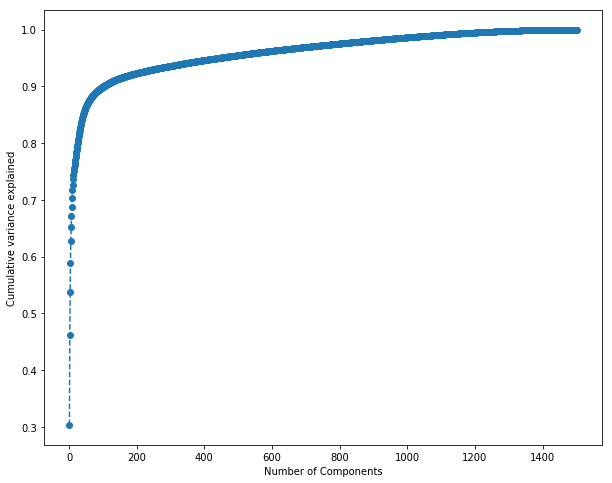

In [52]:
plt.figure(figsize=(10,8))
plt.plot(range(1,1502),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance explained')

In [55]:
z=list(zip(range(1,1502),pca.explained_variance_ratio_.cumsum()))
#n=25


In [57]:
pca = PCA(n_components = 25) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25'] 

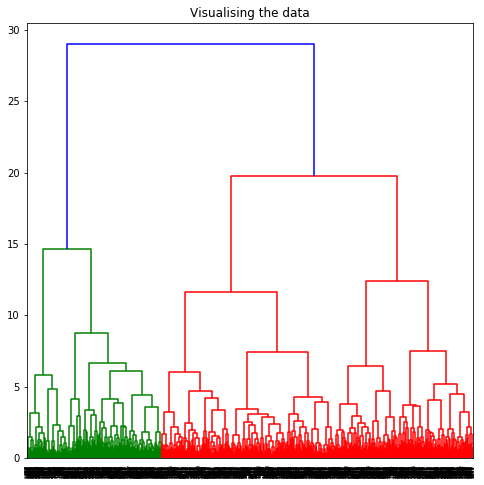

In [58]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

In [59]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4) 
ac5 = AgglomerativeClustering(n_clusters = 5) 
ac6 = AgglomerativeClustering(n_clusters = 6) 


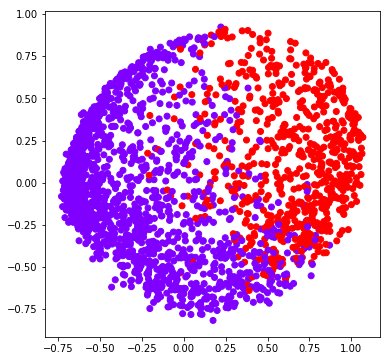

In [60]:
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

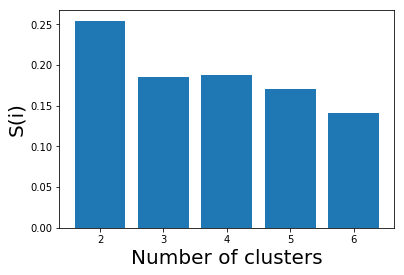

In [61]:
k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 